# Goal

### Implementing Linear regression from scratch on Diabetes dataset

# Tools

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Loading Dataset

In [2]:
diabetes = datasets.load_diabetes() 
diabetes.keys() 

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [3]:
diabetes['feature_names']

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

## putting our data in a dataframe

In [4]:
df = pd.DataFrame(diabetes['data'],columns = diabetes['feature_names'])

In [5]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [6]:
df.count()

age    442
sex    442
bmi    442
bp     442
s1     442
s2     442
s3     442
s4     442
s5     442
s6     442
dtype: int64

# Splitting data

In [7]:
x_train,x_test,y_train,y_test = train_test_split(datasets.load_diabetes().data,datasets.load_diabetes().target,test_size = 0.2,random_state = 0)

# Implementing Linear Regression

In [8]:
class LinearRegressionMAE:
    
    def __init__(self, lr=0.01, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for i in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias
            
            # Calculate gradient of MAE w.r.t weights and bias
            d_w = (1/n_samples) * np.dot(X.T, np.sign(y_pred - y))
            d_b = (1/n_samples) * np.sum(np.sign(y_pred - y))
            
            # Update weights and bias
            self.weights -= self.lr * d_w
            self.bias -= self.lr * d_b
            
    def predict(self, X):
        y_pred = np.dot(X, self.weights) + self.bias
        return y_pred
  

# Running Model on Dataset

In [10]:
model = LinearRegressionMAE(lr=0.01, n_iters=50000)
model.fit(x_train, y_train)

In [11]:
y_pred = model.predict(x_test)

In [15]:
result = pd.DataFrame({'Actual': y_test, 'Predict' : y_pred})
result

,Actual,Predict
0,321.0,138.221605
1,215.0,138.717756
2,127.0,136.940856
3,64.0,135.512468
4,175.0,136.057444
...,...,...
84,104.0,134.632395
85,49.0,135.078680
86,103.0,135.244613
87,142.0,137.815427


# Plotting

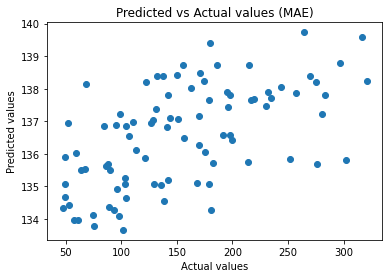

In [16]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Predicted vs Actual values (MAE)")
plt.show()

In [18]:
mae = 0
for i in range(len(y_pred)):
    mae += abs(y_test[i] - y_pred[i])
    
mae /= len(y_pred)

In [20]:
print("Mean Absolute Error:", mae)

Mean Absolute Error: 58.472985160921205


# Using scikit-Learn methods

In [ ]:
regressor_sk = LinearRegression()
regressor_sk.fit(x_train, y_train)

In [ ]:
y_pred = regressor_sk.predict(x_test)

In [ ]:
result = pd.DataFrame({'Actual': y_test, 'Predict' : y_pred})
result

In [ ]:
mae = mean_absolute_error(y_test, y_pred)

In [ ]:
print(f'Mean absolute error: {mae:.2f}')

# Comparing the Performance of the Two Regressors

### Making the Prediction using Sklearn Regression

In [ ]:
data = [[0.25      , 0.        , 0.55371901, 0.34285714, 0.25490196,
       0.25996016, 0.30263158, 0.14104372, 0.20026662, 0.28787879]]


In [ ]:
pred = regressor_sk.predict(data)
print(pred)

### Making a Prediction using our model

In [ ]:
pred = regressor.predict(W_trained, data)
print(sum(pred))